# **Machine Learning - Kelompok 3**

## **Load Data**

In [1]:
from google.colab import files

uploaded = files.upload()

Saving adult.csv to adult.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('adult.csv')
df.head(10)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
7,74,State-gov,88638,Doctorate,16,Never-married,Prof-specialty,Other-relative,White,Female,0,3683,20,United-States,>50K
8,68,Federal-gov,422013,HS-grad,9,Divorced,Prof-specialty,Not-in-family,White,Female,0,3683,40,United-States,<=50K
9,41,Private,70037,Some-college,10,Never-married,Craft-repair,Unmarried,White,Male,0,3004,60,?,>50K


## **Pre-processing Data**

In [3]:
df.shape

(4675, 15)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4675 entries, 0 to 4674
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             4675 non-null   int64 
 1   workclass       4675 non-null   object
 2   fnlwgt          4675 non-null   int64 
 3   education       4675 non-null   object
 4   education.num   4675 non-null   int64 
 5   marital.status  4675 non-null   object
 6   occupation      4675 non-null   object
 7   relationship    4675 non-null   object
 8   race            4675 non-null   object
 9   sex             4675 non-null   object
 10  capital.gain    4675 non-null   int64 
 11  capital.loss    4675 non-null   int64 
 12  hours.per.week  4675 non-null   int64 
 13  native.country  4675 non-null   object
 14  income          4675 non-null   object
dtypes: int64(6), object(9)
memory usage: 548.0+ KB


In [5]:
print(df.columns.tolist())

['age', 'workclass', 'fnlwgt', 'education', 'education.num', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'capital.gain', 'capital.loss', 'hours.per.week', 'native.country', 'income']


In [6]:
# Ganti '?' dengan NaN
df.replace('?', np.nan, inplace=True)

# Bersihkan tanda kutip ganda (") dan spasi di nama kolom
df.columns = df.columns.str.replace('"', '').str.strip()

# Cek kembali jumlah nilai yang hilang di setiap kolom
print(df.isnull().sum())

# Isi nilai NaN dengan modus (nilai yang paling sering muncul) dari masing-masing kolomnya
for col in ['workclass', 'occupation', 'native.country']:
    if col in df.columns:  # biar aman kalau ada kolom yang nggak ada
        df[col].fillna(df[col].mode()[0], inplace=True)

# Cek lagi untuk memastikan sudah tidak ada nilai yang hilang
print("\nSetelah diisi:")
print(df.isnull().sum())

age                 0
workclass         209
fnlwgt              0
education           0
education.num       0
marital.status      0
occupation        209
relationship        0
race                0
sex                 0
capital.gain        0
capital.loss        0
hours.per.week      0
native.country     97
income              0
dtype: int64

Setelah diisi:
age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64


/tmp/ipython-input-769065947.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


In [7]:
# Pastikan nama kolom sudah bersih dari tanda kutip atau spasi
df.columns = df.columns.str.replace('"', '').str.strip()

# Cek nama kolom sebelum drop (opsional, buat ngecek aja)
print("Kolom yang ada sekarang:", df.columns.tolist())

# Daftar kolom yang mau dihapus
cols_to_drop = ['fnlwgt', 'education', 'relationship', 'race', 'native.country', 'income']

# Hapus kolom yang memang ada aja (biar gak error)
df.drop(columns=[col for col in cols_to_drop if col in df.columns], inplace=True)

print("Shape dataframe setelah drop kolom:", df.shape)
df.head()

Kolom yang ada sekarang: ['age', 'workclass', 'fnlwgt', 'education', 'education.num', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'capital.gain', 'capital.loss', 'hours.per.week', 'native.country', 'income']
Shape dataframe setelah drop kolom: (4675, 9)


,age,workclass,education.num,marital.status,occupation,sex,capital.gain,capital.loss,hours.per.week
0,90,Private,9,Widowed,Prof-specialty,Female,0,4356,40
1,82,Private,9,Widowed,Exec-managerial,Female,0,4356,18
2,66,Private,10,Widowed,Prof-specialty,Female,0,4356,40
3,54,Private,4,Divorced,Machine-op-inspct,Female,0,3900,40
4,41,Private,10,Separated,Prof-specialty,Female,0,3900,40


In [8]:
# Lakukan One-Hot Encoding pada semua kolom kategorikal
df_processed = pd.get_dummies(df, drop_first=True)

print("Shape dataframe setelah encoding:", df_processed.shape)
df_processed.head()

Shape dataframe setelah encoding: (4675, 31)


,age,education.num,capital.gain,capital.loss,hours.per.week,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,...,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,sex_Male
0,90,9,0,4356,40,False,True,False,False,False,...,False,False,False,False,True,False,False,False,False,False
1,82,9,0,4356,18,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,66,10,0,4356,40,False,True,False,False,False,...,False,False,False,False,True,False,False,False,False,False
3,54,4,0,3900,40,False,True,False,False,False,...,False,True,False,False,False,False,False,False,False,False
4,41,10,0,3900,40,False,True,False,False,False,...,False,False,False,False,True,False,False,False,False,False


In [9]:
from sklearn.preprocessing import StandardScaler

# Inisialisasi scaler
scaler = StandardScaler()

# Lakukan scaling pada seluruh data
scaled_features = scaler.fit_transform(df_processed)

# Buat dataframe baru dari data yang sudah di-scaling
df_scaled = pd.DataFrame(scaled_features, columns=df_processed.columns)

print("Data setelah di-scaling (5 baris pertama):")
df_scaled.head()

Data setelah di-scaling (5 baris pertama):


,age,education.num,capital.gain,capital.loss,hours.per.week,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,...,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,sex_Male
0,3.580886,-0.720533,-0.412164,4.153486,-0.246044,-0.286663,0.668186,-0.259991,-0.322733,-0.201839,...,-0.158806,-0.223280,-0.225384,-0.046299,1.793184,-0.140104,-0.369648,-0.183319,-0.214698,-1.757872
1,2.975854,-0.720533,-0.412164,4.153486,-2.046772,-0.286663,0.668186,-0.259991,-0.322733,-0.201839,...,-0.158806,-0.223280,-0.225384,-0.046299,-0.557667,-0.140104,-0.369648,-0.183319,-0.214698,-1.757872
2,1.765789,-0.347252,-0.412164,4.153486,-0.246044,-0.286663,0.668186,-0.259991,-0.322733,-0.201839,...,-0.158806,-0.223280,-0.225384,-0.046299,1.793184,-0.140104,-0.369648,-0.183319,-0.214698,-1.757872
3,0.858240,-2.586940,-0.412164,3.648144,-0.246044,-0.286663,0.668186,-0.259991,-0.322733,-0.201839,...,-0.158806,4.478678,-0.225384,-0.046299,-0.557667,-0.140104,-0.369648,-0.183319,-0.214698,-1.757872
4,-0.124938,-0.347252,-0.412164,3.648144,-0.246044,-0.286663,0.668186,-0.259991,-0.322733,-0.201839,...,-0.158806,-0.223280,-0.225384,-0.046299,1.793184,-0.140104,-0.369648,-0.183319,-0.214698,-1.757872


## **Klasterisasi - K-Means**

In [10]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

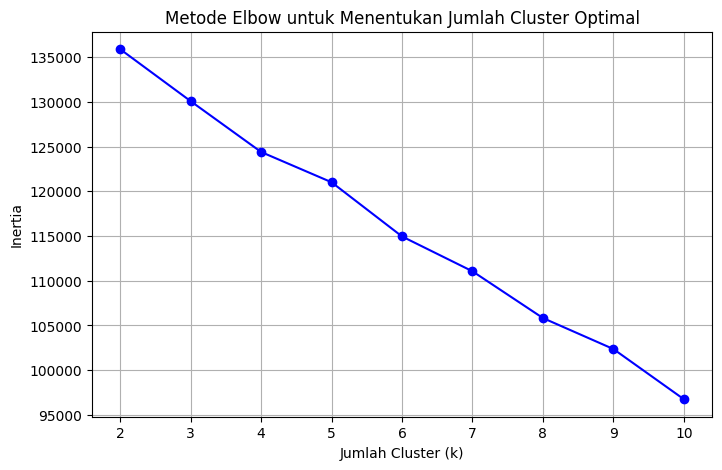

In [11]:
# Menentukan jumlah cluster optimal
inertia = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

# Visualisasi hasil metode Elbow
plt.figure(figsize=(8,5))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Inertia')
plt.title('Metode Elbow untuk Menentukan Jumlah Cluster Optimal')
plt.grid(True)
plt.show()

In [12]:
# model K-Means dengan jumlah cluster (k) = 4
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(df_scaled)

#hasil cluster ke dataframe asli
df['Cluster'] = kmeans.labels_

# hasil awal
df.head()

,age,workclass,education.num,marital.status,occupation,sex,capital.gain,capital.loss,hours.per.week,Cluster
0,90,Private,9,Widowed,Prof-specialty,Female,0,4356,40,0
1,82,Private,9,Widowed,Exec-managerial,Female,0,4356,18,1
2,66,Private,10,Widowed,Prof-specialty,Female,0,4356,40,0
3,54,Private,4,Divorced,Machine-op-inspct,Female,0,3900,40,1
4,41,Private,10,Separated,Prof-specialty,Female,0,3900,40,0


In [13]:
# hanya kolom numerik untuk perhitungan rata-rata
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Ringkasan karakteristik tiap cluster
cluster_summary = df.groupby('Cluster')[numeric_cols].mean()
print("Ringkasan Rata-rata Tiap Cluster:")
print(cluster_summary)

Ringkasan Rata-rata Tiap Cluster:
               age  education.num  capital.gain  capital.loss  hours.per.week
Cluster                                                                      
0        43.855918      12.345626   8135.804460    589.911664       40.988851
1        39.073478       9.634625   4120.966281    609.011072       41.464016
2        49.320946      11.844595  18382.682432    584.915541       49.135135
3        45.696574      11.463295   9766.184339    629.382545       45.943719


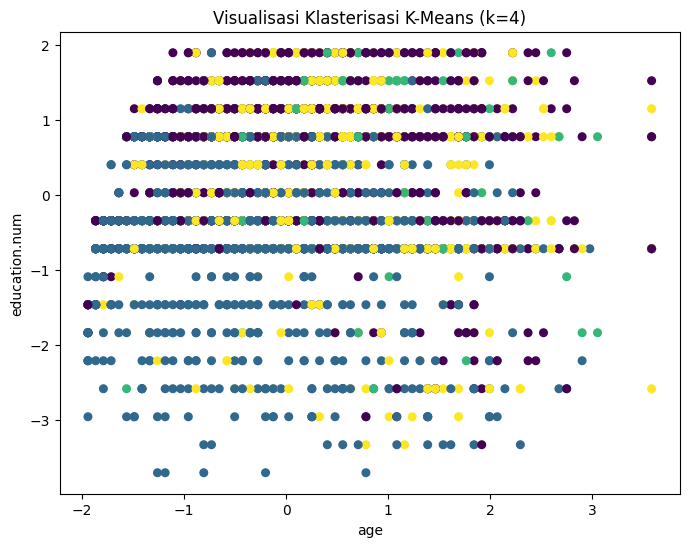

In [14]:
plt.figure(figsize=(8, 6))

# .iloc untuk akses kolom pertama dan kedua dari df_scaled
plt.scatter(df_scaled.iloc[:, 0], df_scaled.iloc[:, 1],
            c=kmeans.labels_, cmap='viridis', s=30)

plt.title('Visualisasi Klasterisasi K-Means (k=4)')
plt.xlabel(df_scaled.columns[0])
plt.ylabel(df_scaled.columns[1])
plt.show()


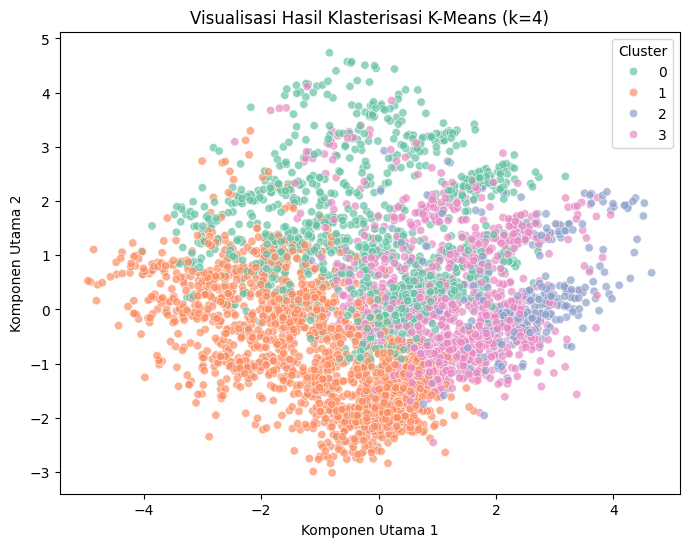

In [15]:
[23]
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

# Gabungkan label cluster dengan data ter-skala
df_scaled_with_cluster = df_scaled.copy()
df_scaled_with_cluster['Cluster'] = df['Cluster']

# Lakukan PCA ke 2 dimensi
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_scaled)

# Visualisasi hasil klasterisasi dalam 2D
plt.figure(figsize=(8,6))
sns.scatterplot(
    x=pca_result[:, 0],
    y=pca_result[:, 1],
    hue=df_scaled_with_cluster['Cluster'],
    palette='Set2',
    alpha=0.7
)
plt.title('Visualisasi Hasil Klasterisasi K-Means (k=4)')
plt.xlabel('Komponen Utama 1')
plt.ylabel('Komponen Utama 2')
plt.show()



In [16]:
from sklearn.metrics import silhouette_score

# Gunakan data ter-skala dan label cluster dari df
score = silhouette_score(df_scaled, df['Cluster'])
print(f"Silhouette Score: {score:.3f}")


Silhouette Score: 0.094


## **Klasterisasi - DBScan**

In [ ]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score



Hasil Pengujian Parameter DBSCAN:


,eps,min_samples,clusters,noise,silhouette
0,0.3,3,103,4121,-0.470034
1,0.3,5,28,4413,-0.396051
2,0.3,10,3,4631,-0.282827
3,0.5,3,175,2997,-0.277371
4,0.5,5,71,3532,-0.313848
5,0.5,10,14,4147,-0.293983
6,0.7,3,232,2176,-0.082028
7,0.7,5,93,2829,-0.179872
8,0.7,10,33,3508,-0.258061
9,1.0,3,201,1469,0.088799



Parameter terbaik: eps=1.5, min_samples=3, Silhouette=0.188


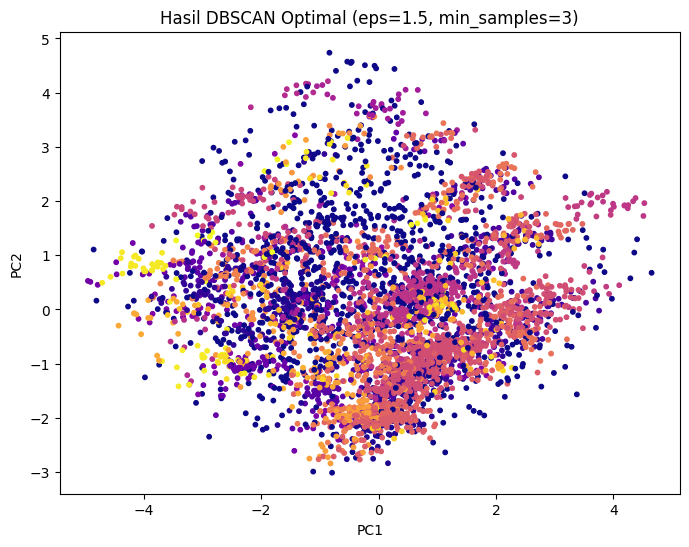

Silhouette Score DBSCAN terbaik: 0.188


In [17]:
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

# --- Uji beberapa kombinasi parameter DBSCAN ---
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(df_scaled)

eps_values = [0.3, 0.5, 0.7, 1.0, 1.5]
min_samples_values = [3, 5, 10]
results = []

best_score = -1
best_params = None

for eps in eps_values:
    for ms in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=ms)
        db_labels = dbscan.fit_predict(df_scaled)
        n_clusters = len(set(db_labels)) - (1 if -1 in db_labels else 0)
        n_noise = list(db_labels).count(-1)

        # Hitung silhouette hanya jika cluster > 1
        if n_clusters > 1:
            score = silhouette_score(df_scaled, db_labels)
            results.append((eps, ms, n_clusters, n_noise, score))
            if score > best_score:
                best_score = score
                best_params = (eps, ms)
        else:
            results.append((eps, ms, n_clusters, n_noise, None))

# --- Tampilkan hasil pengujian ---
results_df = pd.DataFrame(results, columns=['eps', 'min_samples', 'clusters', 'noise', 'silhouette'])
print("\nHasil Pengujian Parameter DBSCAN:")
display(results_df)

print(f"\nParameter terbaik: eps={best_params[0]}, min_samples={best_params[1]}, Silhouette={best_score:.3f}")

# --- Jalankan DBSCAN dengan parameter terbaik ---
dbscan_final = DBSCAN(eps=best_params[0], min_samples=best_params[1])
db_labels = dbscan_final.fit_predict(df_scaled)

# --- Visualisasi hasil terbaik ---
plt.figure(figsize=(8,6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=db_labels, cmap='plasma', s=10)
plt.title(f"Hasil DBSCAN Optimal (eps={best_params[0]}, min_samples={best_params[1]})")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

# --- Tampilkan Silhouette Score akhir ---
print(f"Silhouette Score DBSCAN terbaik: {best_score:.3f}")


Distribusi data per klaster:
Cluster
-1      942
 81     217
 98     215
 106    180
 96     145
       ... 
 165      3
 183      3
 182      3
 184      3
 187      3
Name: count, Length: 189, dtype: int64

Menampilkan 10 klaster dengan jumlah data terbanyak dari total 189 klaster.


/tmp/ipython-input-672442009.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


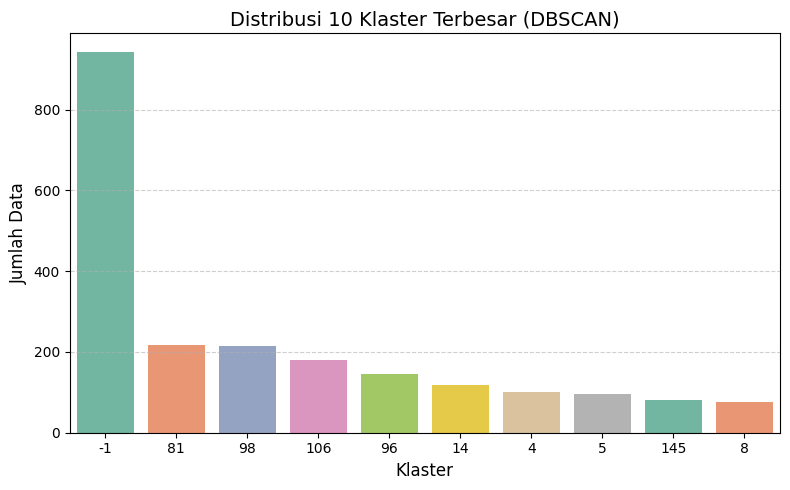


Terdapat 189 klaster. Menampilkan hanya klaster dengan lebih dari 50.


/tmp/ipython-input-672442009.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=filtered_clusters.index.astype(str), y=filtered_clusters.values, palette='viridis')


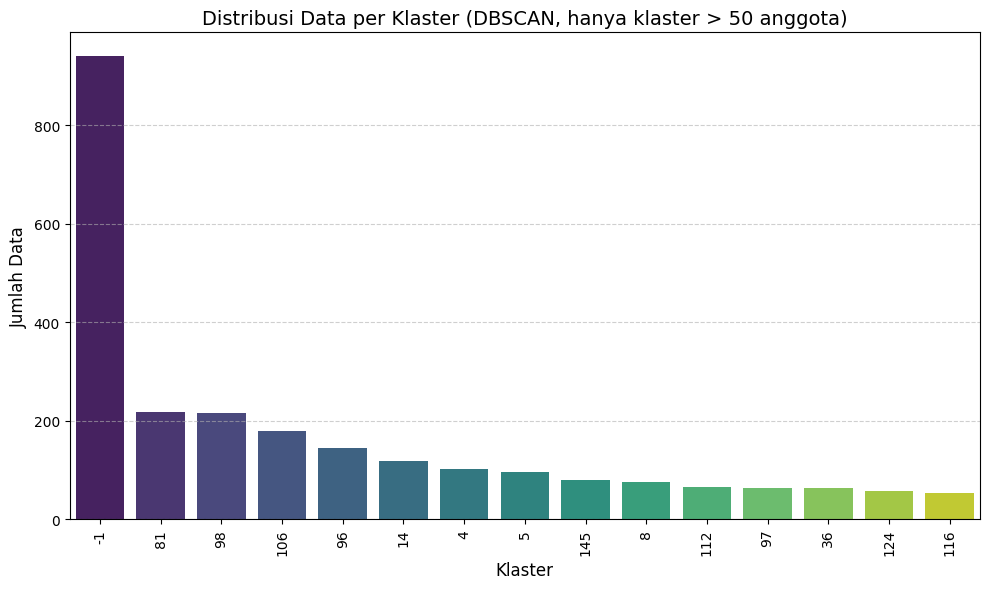


Ringkasan rata-rata fitur per klaster:


,age,education.num,capital.gain,capital.loss,hours.per.week,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,...,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,sex_Male
Cluster,,,,,,,,,,,,,,,,,,,,,
-1,46.28,10.19,9744.30,736.61,41.51,0.13,0.43,0.09,0.19,0.08,...,0.04,0.04,0.08,0.01,0.18,0.04,0.09,0.06,0.06,0.59
0,43.25,11.95,4488.05,443.98,41.25,0.00,1.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
1,46.45,12.82,0.00,2045.36,46.36,0.00,1.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
2,32.76,12.10,5571.35,716.10,47.04,0.00,1.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
3,45.19,8.35,0.00,1884.24,46.97,0.00,1.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,36.00,8.00,2506.33,0.00,35.00,0.00,1.00,0.00,0.00,0.00,...,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
184,42.67,13.33,1108.33,0.00,41.67,0.00,0.00,0.00,1.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
185,35.75,10.50,1558.50,0.00,39.75,1.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Tambahkan hasil klaster ke dataframe
df_dbscan = df_processed.copy()
df_dbscan['Cluster'] = db_labels

# Hitung distribusi jumlah data per klaster (termasuk noise -1)
# Hitung distribusi jumlah data per klaster (termasuk noise -1)
cluster_counts = df_dbscan['Cluster'].value_counts().sort_values(ascending=False)
print("Distribusi data per klaster:")
print(cluster_counts)

# Jika terlalu banyak klaster, tampilkan hanya 10 klaster terbesar
max_clusters_to_show = 10
if len(cluster_counts) > max_clusters_to_show:
    print(f"\nMenampilkan {max_clusters_to_show} klaster dengan jumlah data terbanyak dari total {len(cluster_counts)} klaster.")
    cluster_counts_plot = cluster_counts.head(max_clusters_to_show)
else:
    cluster_counts_plot = cluster_counts

# Visualisasi jumlah data tiap klaster
plt.figure(figsize=(8,5))
sns.barplot(
    x=cluster_counts_plot.index.astype(str),
    y=cluster_counts_plot.values,
    palette='Set2'
)
plt.title('Distribusi 10 Klaster Terbesar (DBSCAN)', fontsize=14)
plt.xlabel('Klaster', fontsize=12)
plt.ylabel('Jumlah Data', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


# Jika klaster terlalu banyak, tampilkan hanya klaster dengan > 50 anggota
banyak_cluster = len(cluster_counts)
if banyak_cluster > 20:
    print(f"\nTerdapat {banyak_cluster} klaster. Menampilkan hanya klaster dengan lebih dari 50.")
    filtered_clusters = cluster_counts[cluster_counts > 50]

    plt.figure(figsize=(10,6))
    sns.barplot(x=filtered_clusters.index.astype(str), y=filtered_clusters.values, palette='viridis')
    plt.title('Distribusi Data per Klaster (DBSCAN, hanya klaster > 50 anggota)', fontsize=14)
    plt.xlabel('Klaster', fontsize=12)
    plt.ylabel('Jumlah Data', fontsize=12)
    plt.xticks(rotation=90)
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

# Rata-rata fitur numerik per klaster (jika ada lebih dari 1 klaster)
if len(set(db_labels)) > 1:
    cluster_summary = df_dbscan.groupby('Cluster').mean().round(2)
    print("\nRingkasan rata-rata fitur per klaster:")
    display(cluster_summary)
else:
    print("\nDBSCAN hanya membentuk satu klaster atau semua dianggap noise.")


Hasil pengujian (top 10 menurut silhouette):


,eps,min_samples,clusters,noise,silhouette
103,0.441,15,2,33,0.338
85,0.392,10,2,35,0.319
83,0.392,8,2,17,0.318
87,0.392,12,2,46,0.316
88,0.392,13,2,48,0.315
86,0.392,11,2,41,0.315
90,0.392,15,2,62,0.315
72,0.344,10,2,69,0.313
71,0.344,9,2,65,0.311
89,0.392,14,2,57,0.309



Parameter terbaik: eps=0.4410, min_samples=15, Silhouette=0.338

Kombinasi dengan silhouette >= 0.1:


,eps,min_samples,clusters,noise,silhouette
103,0.441,15,2,33,0.338
85,0.392,10,2,35,0.319
83,0.392,8,2,17,0.318
87,0.392,12,2,46,0.316
88,0.392,13,2,48,0.315
86,0.392,11,2,41,0.315
90,0.392,15,2,62,0.315
72,0.344,10,2,69,0.313
71,0.344,9,2,65,0.311
89,0.392,14,2,57,0.309



Kombinasi dengan silhouette >= 0.3:


,eps,min_samples,clusters,noise,silhouette
103,0.441,15,2,33,0.338
85,0.392,10,2,35,0.319
83,0.392,8,2,17,0.318
87,0.392,12,2,46,0.316
88,0.392,13,2,48,0.315
86,0.392,11,2,41,0.315
90,0.392,15,2,62,0.315
72,0.344,10,2,69,0.313
71,0.344,9,2,65,0.311
89,0.392,14,2,57,0.309



Kombinasi dengan 0.1 <= silhouette <= 0.5:


,eps,min_samples,clusters,noise,silhouette
103,0.441,15,2,33,0.338
85,0.392,10,2,35,0.319
83,0.392,8,2,17,0.318
87,0.392,12,2,46,0.316
88,0.392,13,2,48,0.315
86,0.392,11,2,41,0.315
90,0.392,15,2,62,0.315
72,0.344,10,2,69,0.313
71,0.344,9,2,65,0.311
89,0.392,14,2,57,0.309



Hasil grid search disimpan ke dbscan_silhouette_grid_search.csv


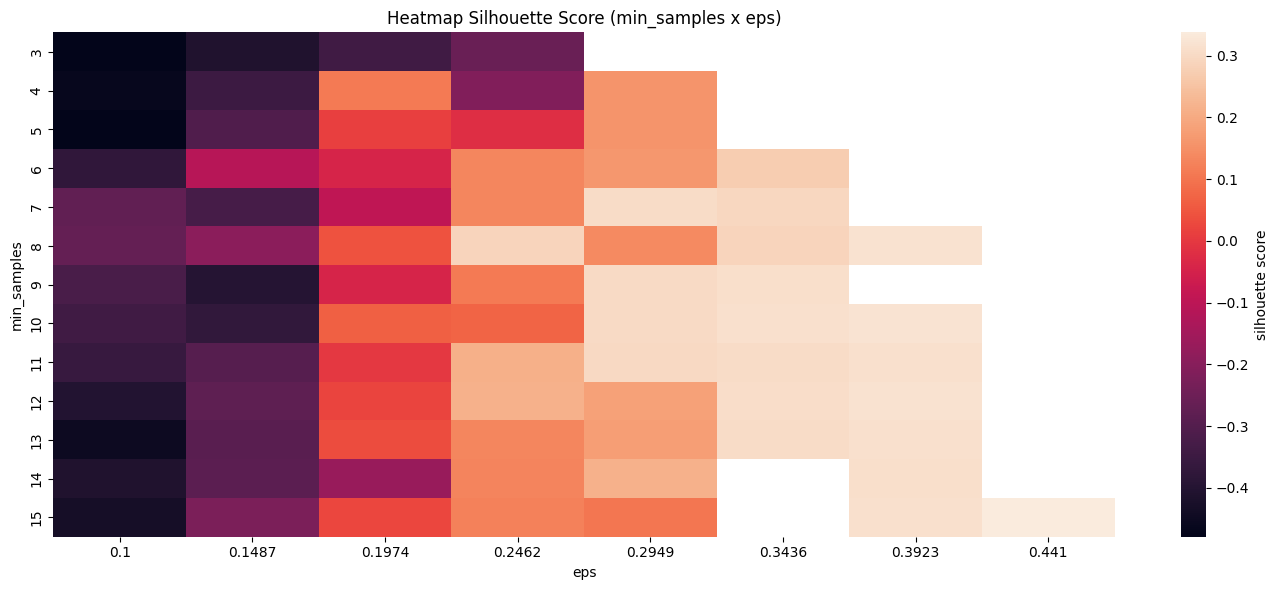

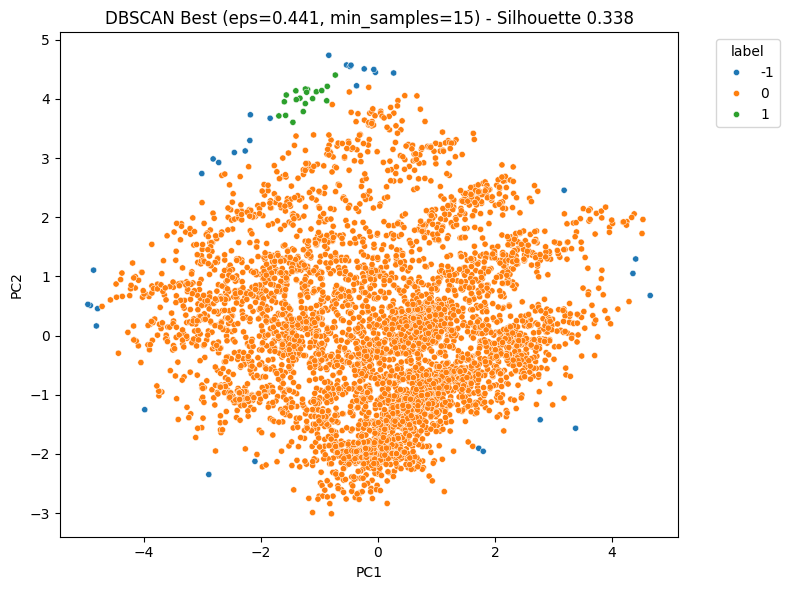

In [19]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=42)
reduced_data = pca.fit_transform(df_scaled)
eps_values = np.linspace(0.1, 2.0, 40)
min_samples_values = list(range(3, 16))

results = []
best_score = -1
best_params = None

for eps in eps_values:
    for ms in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=ms)
        labels = dbscan.fit_predict(reduced_data)
        unique_labels = set(labels)
        n_clusters = len(unique_labels) - (1 if -1 in unique_labels else 0)
        n_noise = list(labels).count(-1)

        if n_clusters > 1:
            try:
                score = silhouette_score(reduced_data, labels)
            except Exception as e:
                score = None
        else:
            score = None

        results.append({
            'eps': float(np.round(eps, 4)),
            'min_samples': int(ms),
            'clusters': int(n_clusters),
            'noise': int(n_noise),
            'silhouette': None if score is None else float(score)
        })

        if score is not None and score > best_score:
            best_score = float(score)
            best_params = (float(eps), int(ms))

results_df = pd.DataFrame(results)
pd.set_option('display.precision', 3)
print("Hasil pengujian (top 10 menurut silhouette):")
display(results_df.dropna(subset=['silhouette']).sort_values('silhouette', ascending=False).head(10))

if best_params is not None:
    print(f"\nParameter terbaik: eps={best_params[0]:.4f}, min_samples={best_params[1]}, Silhouette={best_score:.3f}")
else:
    print("\nTidak ditemukan kombinasi yang menghasilkan silhouette (clusters >1).")
print("\nKombinasi dengan silhouette >= 0.1:")
display(results_df[results_df['silhouette'] >= 0.1].sort_values('silhouette', ascending=False))
print("\nKombinasi dengan silhouette >= 0.3:")
display(results_df[results_df['silhouette'] >= 0.3].sort_values('silhouette', ascending=False))
print("\nKombinasi dengan 0.1 <= silhouette <= 0.5:")
display(results_df[(results_df['silhouette'] >= 0.1) & (results_df['silhouette'] <= 0.5)].sort_values('silhouette', ascending=False))
results_df.to_csv('dbscan_silhouette_grid_search.csv', index=False)
print("\nHasil grid search disimpan ke dbscan_silhouette_grid_search.csv")
pivot = results_df.pivot_table(index='min_samples', columns='eps', values='silhouette', aggfunc='mean')
plt.figure(figsize=(14,6))
sns.heatmap(pivot, annot=False, fmt=".2f", cbar_kws={'label': 'silhouette score'})
plt.title('Heatmap Silhouette Score (min_samples x eps)')
plt.ylabel('min_samples')
plt.xlabel('eps')
plt.tight_layout()
plt.show()

if best_params is not None:
    eps_best, ms_best = best_params
    db_final = DBSCAN(eps=eps_best, min_samples=ms_best)
    final_labels = db_final.fit_predict(reduced_data)
    plt.figure(figsize=(8,6))
    sns.scatterplot(x=reduced_data[:,0], y=reduced_data[:,1], hue=final_labels, palette='tab10', legend='full', s=20)
    plt.title(f"DBSCAN Best (eps={eps_best:.3f}, min_samples={ms_best}) - Silhouette {best_score:.3f}")
    plt.xlabel('PC1'); plt.ylabel('PC2')
    plt.legend(title='label', bbox_to_anchor=(1.05,1), loc='upper left')
    plt.tight_layout()
    plt.show()
else:
    print("Tidak ada visualisasi cluster karena tidak ditemukan konfigurasi dengan >=2 cluster.")